In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier



In [4]:
df = pd.read_csv("Liver dataset.csv",encoding= 'unicode_escape')
df.head()

,Age,Gender,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TotalProtiens,ALBAlbumin,A/GRatioAlbuminandGlobulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [5]:

df['Gender'].replace('Female', 0,inplace=True)
df['Gender'].replace('Male', 1,inplace=True)
new_df = df.copy()
df.head()

,Age,Gender,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TotalProtiens,ALBAlbumin,A/GRatioAlbuminandGlobulin Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [6]:
df.isnull().sum()

Age                                   2
Gender                              902
TotalBilirubin                      648
DirectBilirubin                     561
AlkphosAlkalinePhosphotase          796
SgptAlamineAminotransferase         538
SgotAspartateAminotransferase       462
TotalProtiens                       463
ALBAlbumin                          494
A/GRatioAlbuminandGlobulin Ratio    559
Result                                0
dtype: int64

In [7]:
df.info()
new_df = df.copy()



cols = ['Age','Gender','TotalBilirubin','DirectBilirubin','AlkphosAlkalinePhosphotase','SgptAlamineAminotransferase','SgotAspartateAminotransferase','TotalProtiens','ALBAlbumin','A/GRatioAlbuminandGlobulin Ratio']
for i in cols:
    new_df[i] = df[i].fillna(df[i].fillna(df[i]).mean())
    
new_df.info()

new_df = np.array(df)
x = new_df[:, :-1]
y = new_df[:, -1]

x= x .astype('int')
y= y.astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               30689 non-null  float64
 1   Gender                            29789 non-null  float64
 2   TotalBilirubin                    30043 non-null  float64
 3   DirectBilirubin                   30130 non-null  float64
 4   AlkphosAlkalinePhosphotase        29895 non-null  float64
 5   SgptAlamineAminotransferase       30153 non-null  float64
 6   SgotAspartateAminotransferase     30229 non-null  float64
 7   TotalProtiens                     30228 non-null  float64
 8   ALBAlbumin                        30197 non-null  float64
 9   A/GRatioAlbuminandGlobulin Ratio  30132 non-null  float64
 10  Result                            30691 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 2.6 MB
<class 'pandas.core.f

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30,random_state=16)

model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3=  KNeighborsClassifier(n_neighbors=3)
model4 = svm.SVC()
model5 = GaussianNB() 


model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
model4 = model4.fit(x_train, y_train)
model5 = model5.fit(x_train, y_train)

In [13]:
model1_pred = model1.predict(x_test)  #LR
model1_acc = accuracy_score(y_test, model1_pred) *100
print("Accuracy:",model1_acc)
 
model2_pred = model2.predict(x_test)  #RF
model2_acc = accuracy_score(y_test, model2_pred)*100
print("Accuracy:",model2_acc)

model3_pred = model3.predict(x_test) #KNN
model3_acc = accuracy_score(y_test, model3_pred)*100
print("Accuracy:",model3_acc)

model4_pred = model4.predict(x_test) #SVM
model4_acc = accuracy_score(y_test, model4_pred)*100
print("Accuracy:",model4_acc)

model5_pred = model5.predict(x_test)   #NB
model5_acc = accuracy_score(y_test, model5_pred)*100
print("Accuracy:",model5_acc)

Accuracy: 32.6889661164205
Accuracy: 99.66333622936577
Accuracy: 95.51476976542136
Accuracy: 71.98088618592529
Accuracy: 28.160295395308427


In [14]:
final_model = VotingClassifier(estimators=[ ('lr', model1), ('rf', model2),('knn', model3),('svn', model4),('nb', model5)], voting='hard' )


final_model.fit(x_train,y_train)

y_pred = final_model.predict(x_test)

vot_acc  = accuracy_score(y_test, y_pred)*100

print(vot_acc)

97.68679409209383


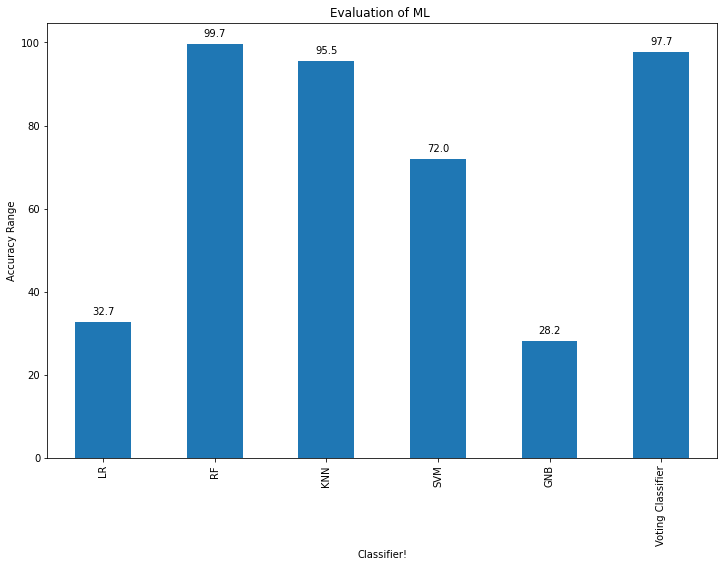

In [15]:
import matplotlib.pyplot as plt

frequencies = [model1_acc,model2_acc,model3_acc,model4_acc,model5_acc,vot_acc]

freq_series = pd.Series(frequencies)

x_labels = ['LR','RF','KNN','SVM','GNB','Voting Classifier']

plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML ')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

       
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)

       
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        
add_value_labels(ax)
plt.show()

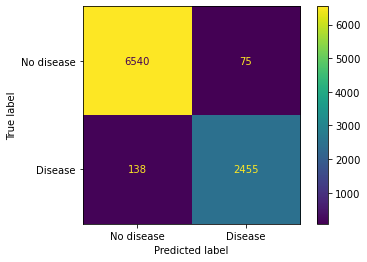

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred,labels=[1,2])

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No disease','Disease'])
cm_disp.plot()

In [17]:
print("Classification report for LR")
m1=model1.predict(x_test)
print(classification_report(y_test, m1))

print("Classification report for RF")
m2=model2.predict(x_test)
print(classification_report(y_test, m2))

print("Classification report for KNN")
m3=model3.predict(x_test)
print(classification_report(y_test, m3))

print("Classification report for SVM")
m4=model4.predict(x_test)
print(classification_report(y_test, m4))

print("Classification report for NB")
m5=model5.predict(x_test)
print(classification_report(y_test, m5))

print("Classification report for Ensembling")

predictions= final_model.predict(x_test)
print(classification_report(y_test, predictions))

Classification report for LR
              precision    recall  f1-score   support

           1       0.71      0.11      0.19      6615
           2       0.28      0.88      0.43      2593

    accuracy                           0.33      9208
   macro avg       0.49      0.50      0.31      9208
weighted avg       0.59      0.33      0.25      9208

Classification report for RF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6615
           2       1.00      0.99      0.99      2593

    accuracy                           1.00      9208
   macro avg       1.00      0.99      1.00      9208
weighted avg       1.00      1.00      1.00      9208

Classification report for KNN
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      6615
           2       0.92      0.92      0.92      2593

    accuracy                           0.96      9208
   macro avg       0.94      0.94      0

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      0.99      0.98      6615
           2       0.97      0.95      0.96      2593

    accuracy                           0.98      9208
   macro avg       0.97      0.97      0.97      9208
weighted avg       0.98      0.98      0.98      9208



In [18]:
from joblib import dump

dump(final_model,'liver_model')


['liver_model']